# ENEGRY CONSUMPTION PREDIUCTION

In [33]:
# importing necessary libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# importing libraries for ML modelling
from keras.models import Sequential
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Dropout

# importing performance metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [4]:
# reading the dataset as a dataframe
data=pd.read_csv('PJME_HR.csv')

In [5]:
# printing a sample of the dataframe
data.sample(5)

,Datetime,PJME_MW
116273,2015-09-25 18:00:00,31100.0
118647,2015-06-18 16:00:00,38071.0
39476,2006-06-30 06:00:00,27518.0
51202,2007-02-27 23:00:00,33192.0
10233,2003-10-31 12:00:00,31570.0


In [6]:
# printing statistivcal information about the dataframe
data.describe()

,PJME_MW
count,145366.000000
mean,32080.222831
std,6464.012166
min,14544.000000
25%,27573.000000
50%,31421.000000
75%,35650.000000
max,62009.000000


In [7]:
# printing more information abot the dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145366 entries, 0 to 145365
Data columns (total 2 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   Datetime  145366 non-null  object 
 1   PJME_MW   145366 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.2+ MB


In [8]:
# checking for null values
data.isnull().sum()

Datetime    0
PJME_MW     0
dtype: int64

In [9]:
# checking for duplicate values
data.duplicated().sum()

0

we can see that we have a dataframe containing no null values or duplicates

In [10]:
# lets convert the datatype of the 'Datetime' column to datetime
data['Datetime'] = pd.to_datetime(data['Datetime'])

<Axes: >

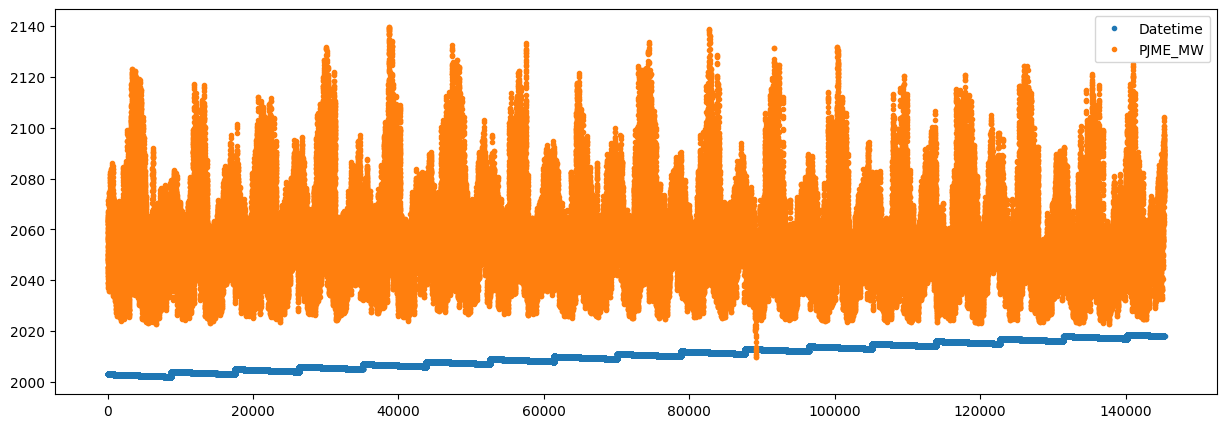

In [11]:
# lets visualise the dataframe by plotting the energy consumption.
data.plot(style='.', figsize = (15,5))

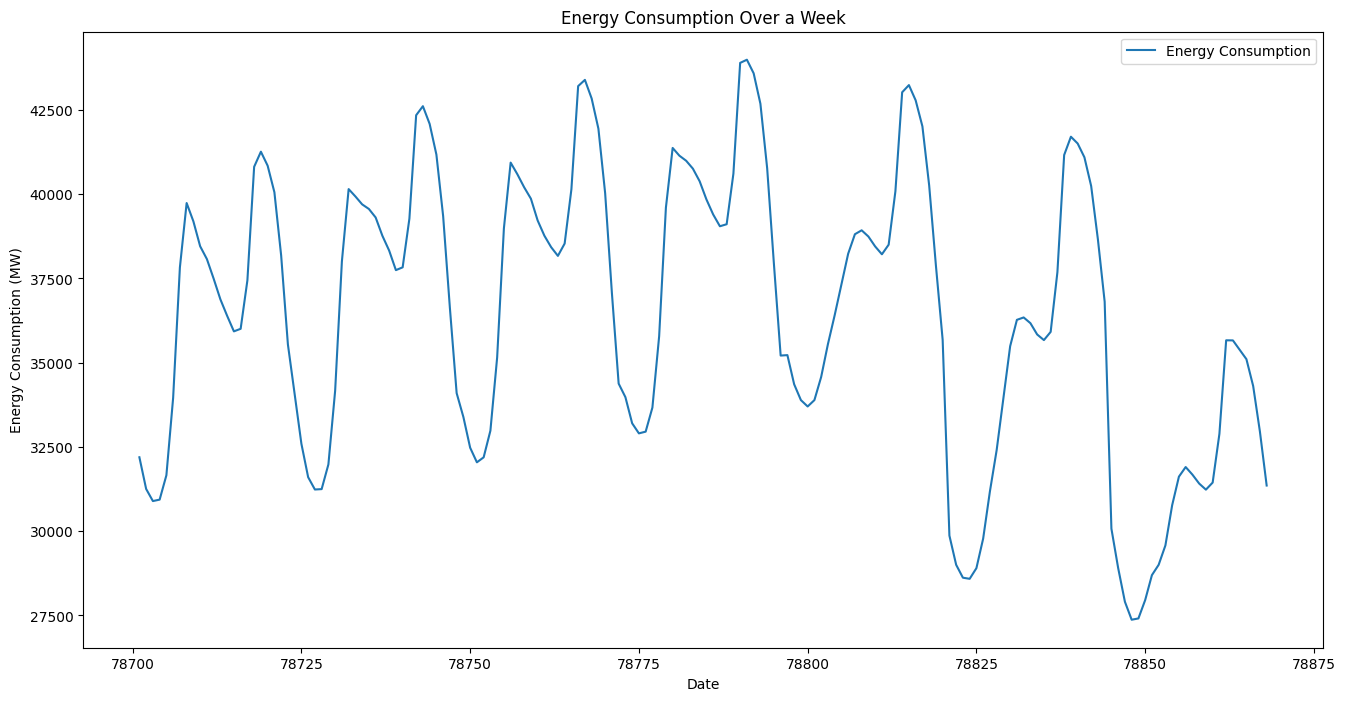

In [12]:
# lets plot a week of energy consumption over a random week

week_data = data.loc[(data['Datetime'] > '2010-01-01') & (data['Datetime'] < '2010-01-08')]

# Plot the data
plt.figure(figsize=(16,8))
plt.plot(week_data.index, week_data['PJME_MW'], label='Energy Consumption')
plt.title('Energy Consumption Over a Week')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (MW)')
plt.legend()
plt.show()

# inferences
1. We can see that there are two peaks of energy consumption over a typical day
2. Energy consumption drops drastically during the night

# Feature Extraction

In [13]:
# lets create a few new features by extracting data from the 'Datetime' column

def create_features(df):
    df['hour'] = df['Datetime'].dt.hour
    df['dayofweek'] = df['Datetime'].dt.dayofweek
    df['quarter'] = df['Datetime'].dt.quarter
    df['month'] = df['Datetime'].dt.month
    df['year'] = df['Datetime'].dt.year
    df['dayofyear'] = df['Datetime'].dt.dayofyear
    return df


In [14]:
data = create_features(data)

In [15]:
# printing a sample of the dataframe to verify changes
data.sample(5)

,Datetime,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear
56052,2008-08-08 02:00:00,28818.0,2,4,3,8,2008,221
86504,2011-02-16 06:00:00,33057.0,6,2,1,2,2011,47
34474,2005-01-25 19:00:00,41736.0,19,1,1,1,2005,25
92293,2012-06-20 12:00:00,47911.0,12,2,2,6,2012,172
96485,2013-12-28 05:00:00,28373.0,5,5,4,12,2013,362


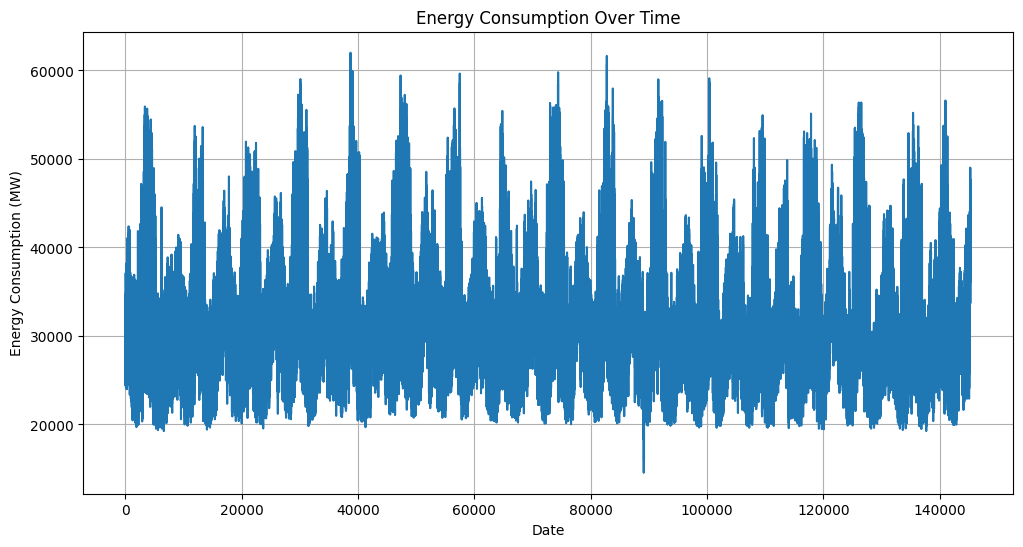

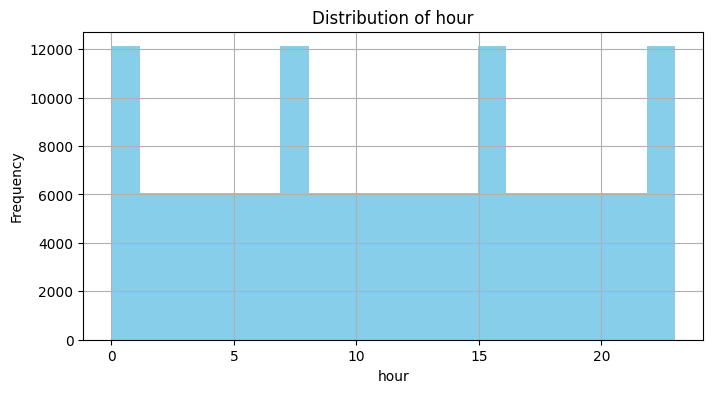

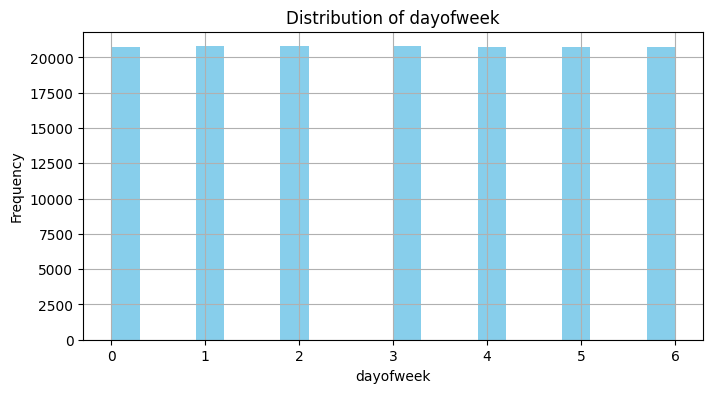

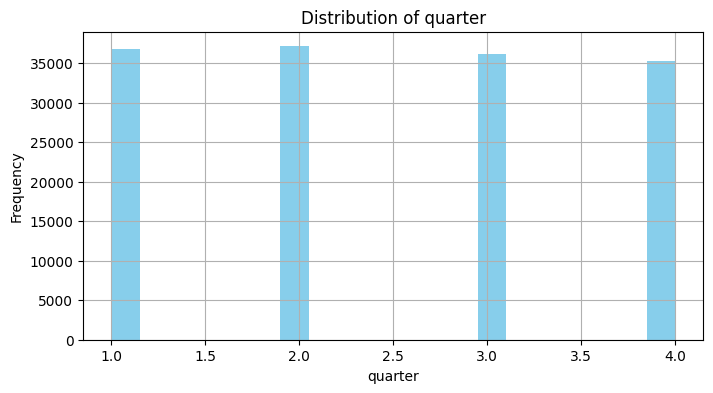

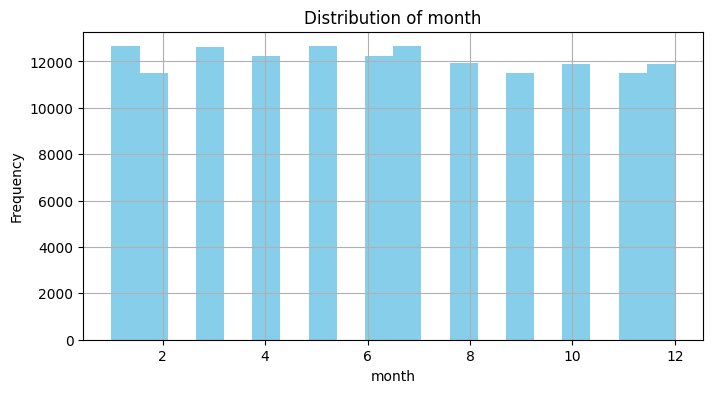

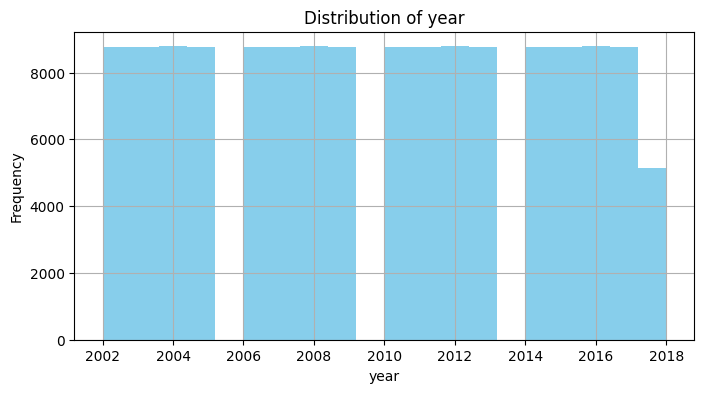

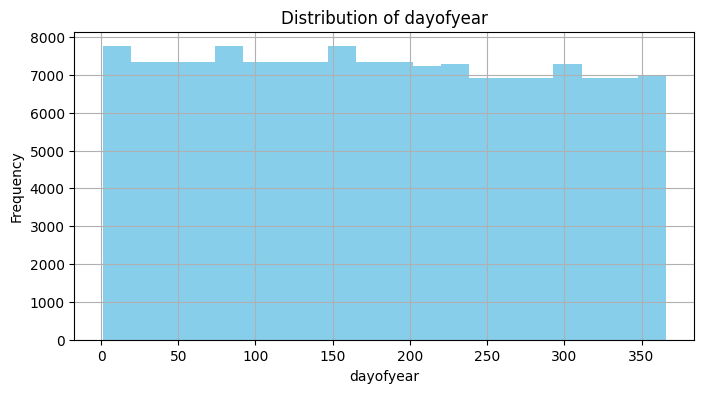

In [16]:
import matplotlib.pyplot as plt

# Plot for 'Datetime' column
plt.figure(figsize=(12, 6))
plt.plot(data.index, data['PJME_MW'])
plt.title('Energy Consumption Over Time')
plt.xlabel('Date')
plt.ylabel('Energy Consumption (MW)')
plt.grid(True)
plt.show()

# Histograms for numeric columns
numeric_columns = ['hour', 'dayofweek', 'quarter', 'month', 'year', 'dayofyear']
for column in numeric_columns:
    plt.figure(figsize=(8, 4))
    data[column].plot(kind='hist', bins=20, color='skyblue')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.grid(True)
    plt.show()


In [17]:
# Print out the unique values and their counts for each column
for i in data.columns:
    if i != 'Datetime':
        print('Number of unique values in column:', i, 'is:', data[i].nunique())
        print(data[i].value_counts())
        print('----------------')


Number of unique values in column: PJME_MW is: 28441
PJME_MW
30051.0    24
32719.0    22
29798.0    22
28095.0    21
32244.0    21
           ..
51354.0     1
50542.0     1
49340.0     1
47574.0     1
40164.0     1
Name: count, Length: 28441, dtype: int64
----------------
Number of unique values in column: hour is: 24
hour
1     6058
14    6058
23    6058
22    6058
21    6058
20    6058
19    6058
18    6058
17    6058
16    6058
15    6058
13    6058
12    6058
11    6058
10    6058
9     6058
8     6058
7     6058
6     6058
5     6058
4     6058
0     6057
2     6050
3     6041
Name: count, dtype: int64
----------------
Number of unique values in column: dayofweek is: 7
dayofweek
2    20784
3    20784
1    20783
0    20760
5    20760
4    20760
6    20735
Name: count, dtype: int64
----------------
Number of unique values in column: quarter is: 4
quarter
2    37123
1    36803
3    36121
4    35319
Name: count, dtype: int64
----------------
Number of unique values in column: month is

# Bivariate Analysis

<Axes: xlabel='hour', ylabel='PJME_MW'>

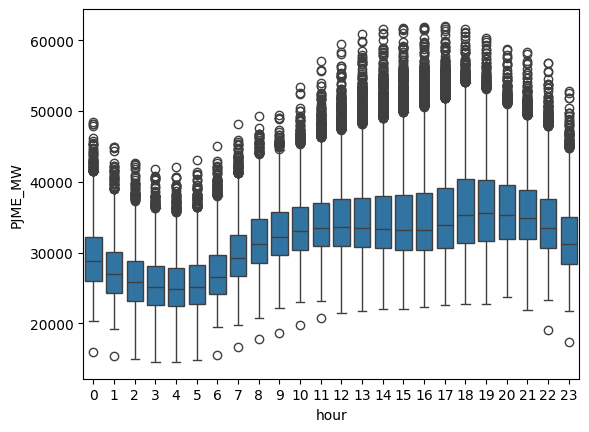

In [18]:
# lets plot the Energy Consumption by hour
sns.boxplot(data,x='hour',y='PJME_MW')

<Axes: xlabel='month', ylabel='PJME_MW'>

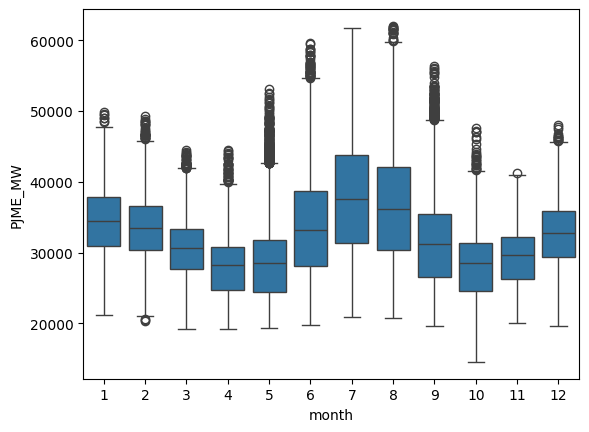

In [19]:
# lets plot the Energy Consumption by month
sns.boxplot(data,x='month',y='PJME_MW')

# Insight
1. We can see that the energy consumption is lower during early hours and increases gradually, peaking in the evening
2. The energy consumption by month peaks twice each year
    - December to January, during the winter season
    - July to August, suring the summer season


In [20]:
data.sample(5)

,Datetime,PJME_MW,hour,dayofweek,quarter,month,year,dayofyear
66512,2009-06-01 00:00:00,25510.0,0,0,2,6,2009,152
44673,2007-11-26 20:00:00,36481.0,20,0,4,11,2007,330
68001,2009-03-29 01:00:00,23805.0,1,6,1,3,2009,88
10071,2003-11-07 18:00:00,32879.0,18,4,4,11,2003,311
30925,2005-06-22 21:00:00,37383.0,21,2,2,6,2005,173


In [21]:
# splitting the dataset into training and testing splits

# Lets take data for all the dates before 1st January 2015 as training data and the data beyond that as test data

# Split the data into training and testing sets
train = data.loc[data['Datetime'] < '2015-01-01']
test = data.loc[data['Datetime'] >= '2015-01-01']


<Axes: xlabel='Datetime'>

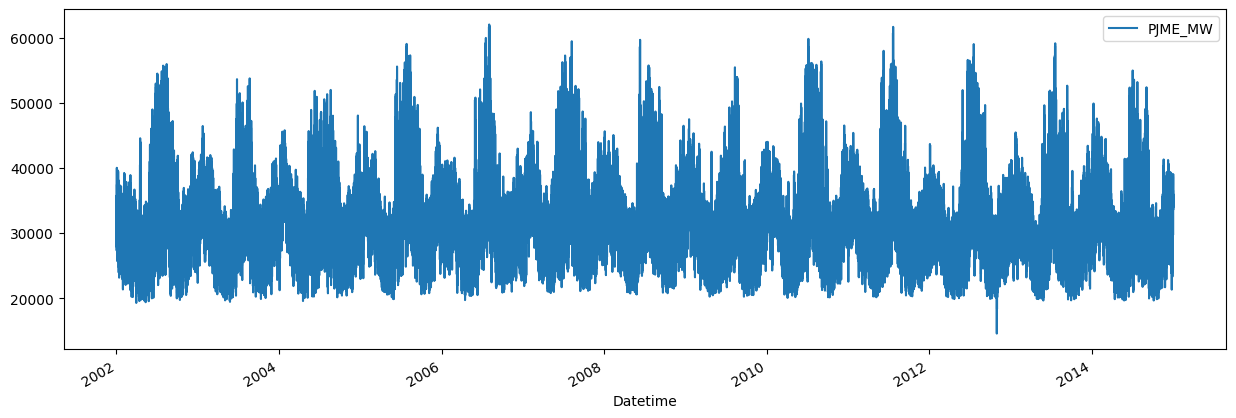

In [22]:
# plotting training data
train.plot(y ='PJME_MW',x='Datetime',figsize = (15,5))

<Axes: xlabel='Datetime'>

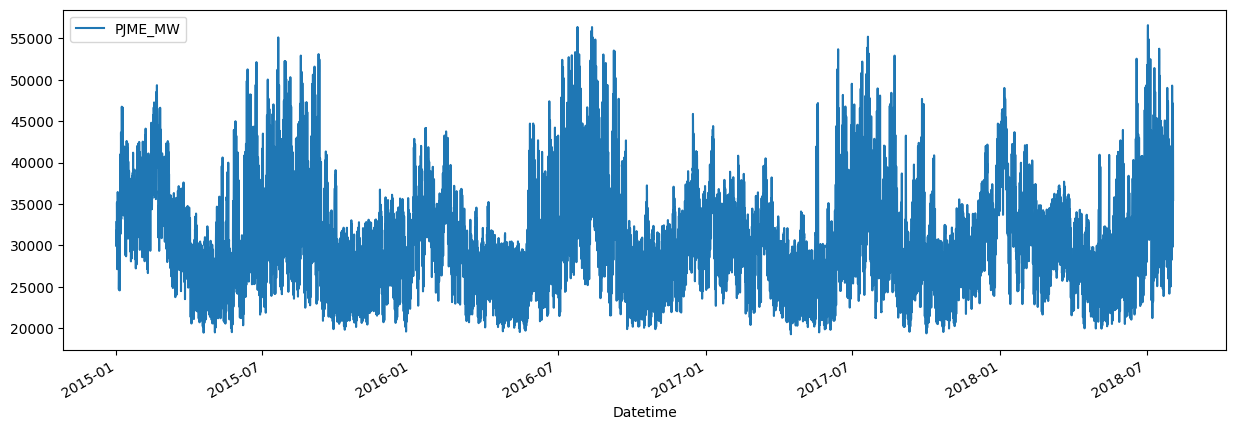

In [23]:
# plotting test data
test.plot(y ='PJME_MW',x='Datetime',figsize=(15,5))

In [24]:
# dropping the renundant column 'Datetime'
train.drop(columns=['Datetime'], inplace=True)
test.drop(columns=['Datetime'], inplace=True)

C:\Users\msi\AppData\Local\Temp\ipykernel_15600\1734664386.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train.drop(columns=['Datetime'], inplace=True)
C:\Users\msi\AppData\Local\Temp\ipykernel_15600\1734664386.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test.drop(columns=['Datetime'], inplace=True)


# ML Modelling

In [25]:
# splitting the Training and Test dataset into input and output features

X_train = train.drop(columns=['PJME_MW'])
y_train = train['PJME_MW']
X_test = test.drop(columns=['PJME_MW'])
y_test = test['PJME_MW']


## Model 1.

In [28]:
# Function to create LSTM model
def create_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(50, input_shape=input_shape))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Convert DataFrame columns to numpy arrays
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape data for LSTM input
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))

# Create LSTM model
model = create_lstm_model(input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))

# Train the model
model.fit(X_train_reshaped, y_train, epochs=50, batch_size=32, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Mean Squared Error (MSE): {mse}')

# Make predictions
predictions = model.predict(X_test_reshaped)

# Compute additional performance metrics
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')


Epoch 1/50
3561/3561 [==============================] - 5s 1ms/step - loss: 1082741248.0000
Epoch 2/50
3561/3561 [==============================] - 4s 1ms/step - loss: 1079874688.0000
Epoch 3/50
3561/3561 [==============================] - 4s 1ms/step - loss: 1076855040.0000
Epoch 4/50
3561/3561 [==============================] - 4s 1ms/step - loss: 1073836544.0000
Epoch 5/50
3561/3561 [==============================] - 4s 1ms/step - loss: 1070822848.0000
Epoch 6/50
3561/3561 [==============================] - 4s 1ms/step - loss: 1067817088.0000
Epoch 7/50
3561/3561 [==============================] - 4s 1ms/step - loss: 1064814144.0000
Epoch 8/50
3561/3561 [==============================] - 4s 1ms/step - loss: 1061814336.0000
Epoch 9/50
3561/3561 [==============================] - 4s 1ms/step - loss: 1058820416.0000
Epoch 10/50
3561/3561 [==============================] - 4s 1ms/step - loss: 1055832960.0000
Epoch 11/50
3561/3561 [==============================] - 4s 1ms/step - loss: 10

In [32]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 881457536.0
Mean Absolute Error (MAE): 28980.32036927978
R-squared (R2) Score: -20.189567992409103


## Model 2

In [34]:
# Function to create a  second LSTM model
def create_second_lstm_model(input_shape):
    model = Sequential()
    model.add(LSTM(100, return_sequences=True, input_shape=input_shape))
    model.add(Dropout(0.2))
    model.add(LSTM(100))
    model.add(Dense(50))
    model.add(Dense(1))
    model.compile(optimizer='adam', loss='mse')
    return model

# Assuming your data is already prepared and split into features and target
# X_train, y_train, X_test, y_test

# Convert DataFrame columns to numpy arrays
X_train_array = X_train.to_numpy()
X_test_array = X_test.to_numpy()

# Reshape data for LSTM input
X_train_reshaped = X_train_array.reshape((X_train_array.shape[0], 1, X_train_array.shape[1]))
X_test_reshaped = X_test_array.reshape((X_test_array.shape[0], 1, X_test_array.shape[1]))

# Create the  second LSTM model
model = create_second_lstm_model(input_shape=(X_train_reshaped.shape[1], X_train_reshaped.shape[2]))

# Train the model
model.fit(X_train_reshaped, y_train, epochs=100, batch_size=64, verbose=1)

# Evaluate the model
mse = model.evaluate(X_test_reshaped, y_test, verbose=0)
print(f'Mean Squared Error (MSE): {mse}')

# Make predictions
predictions = model.predict(X_test_reshaped)

# Compute additional performance metrics
mae = mean_absolute_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')


Epoch 1/100
1781/1781 [==============================] - 7s 2ms/step - loss: 639255680.0000
Epoch 2/100
1781/1781 [==============================] - 4s 2ms/step - loss: 57202228.0000
Epoch 3/100
1781/1781 [==============================] - 4s 2ms/step - loss: 41634956.0000
Epoch 4/100
1781/1781 [==============================] - 4s 2ms/step - loss: 41639036.0000
Epoch 5/100
1781/1781 [==============================] - 4s 2ms/step - loss: 41640440.0000
Epoch 6/100
1781/1781 [==============================] - 4s 2ms/step - loss: 41641388.0000
Epoch 7/100
1781/1781 [==============================] - 4s 2ms/step - loss: 41638976.0000
Epoch 8/100
1781/1781 [==============================] - 4s 2ms/step - loss: 41641300.0000
Epoch 9/100
1781/1781 [==============================] - 5s 3ms/step - loss: 41639228.0000
Epoch 10/100
1781/1781 [==============================] - 4s 2ms/step - loss: 41644032.0000
Epoch 11/100
1781/1781 [==============================] - 4s 2ms/step - loss: 41641916.0

In [35]:
print(f'Mean Squared Error (MSE): {mse}')
print(f'Mean Absolute Error (MAE): {mae}')
print(f'R-squared (R2) Score: {r2}')

Mean Squared Error (MSE): 42415048.0
Mean Absolute Error (MAE): 5239.009282562023
R-squared (R2) Score: -0.019625355139302636


**First Model:**
- Mean Squared Error (MSE): 881457536.0
- Mean Absolute Error (MAE): 28980.32036927978
- R-squared (R2) Score: -20.189567992409103

**Second Model:**
- Mean Squared Error (MSE): 42415048.0
- Mean Absolute Error (MAE): 5239.009282562023
- R-squared (R2) Score: -0.019625355139302636

**Interpretation:**
1. **Mean Squared Error (MSE):**
   - The MSE for the first model is significantly higher (worse) compared to the MSE for the second model. This indicates that the predictions of the first model have larger errors compared to the second model.

2. **Mean Absolute Error (MAE):**
   - Similar to MSE, the MAE for the first model is much higher (worse) compared to the MAE for the second model. This suggests that, on average, the predictions of the first model deviate more from the actual values compared to the second model.

3. **R-squared (R2) Score:**
   - The R-squared score for both models is negative, which is not ideal. A negative R-squared indicates that the models perform worse than a horizontal line (the simplest model). 
   - However, the R-squared score for the second model is closer to zero, indicating that it performs slightly better in explaining the variability in the data compared to the first model. Nonetheless, a negative R-squared suggests that both models are not effective in explaining the variability in the data.
